# Zernike Fit Identity Test
In which we demonstrate that we live in a rational universe:
   * create a surface matrix based off a single zernike coefficient
   * fit zernikes to this surface 
   * then send those (reordered) zernikes to the Active Surface
   * the Active Surface should command actuators to make a surface identical to our original surface matrix (identity!)

In [1]:
%matplotlib notebook

In [7]:
import matplotlib.pylab as plt
import numpy as np
import opticspy

## Simulate surface


<IPython.core.display.Javascript object>


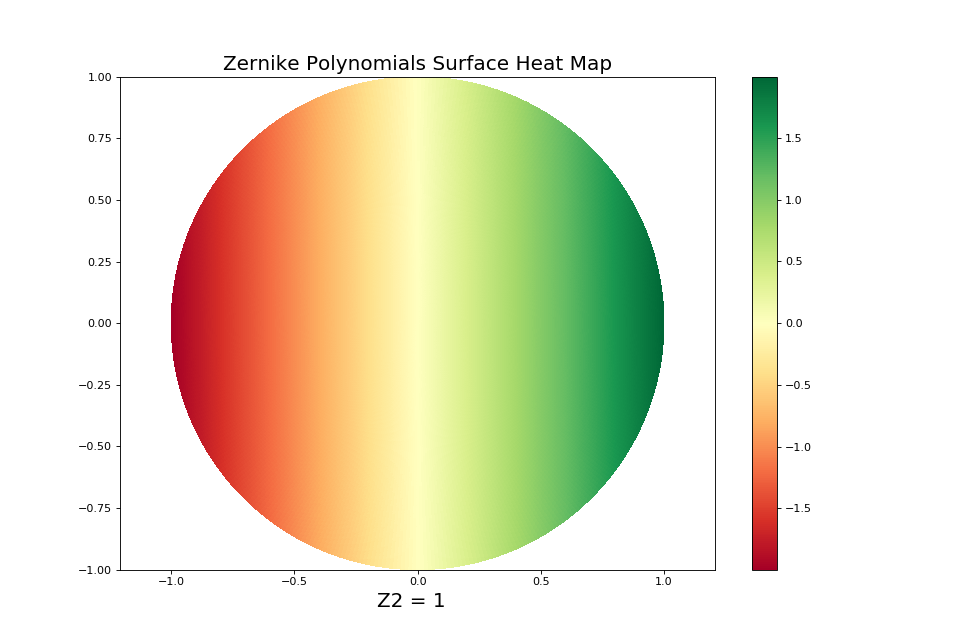

Z2 =  1 Z11 x Tilt


In [5]:

z2 = opticspy.zernike.Coefficient(Z2=1)
z2.zernikemap()

<IPython.core.display.Javascript object>


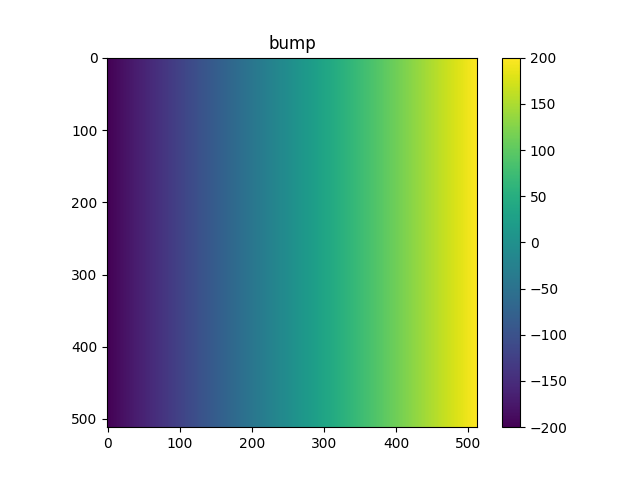

Text(0.5,1,'bump')

In [16]:
z2m = z2.zernikematrix(l=512) * 100.
fig = plt.figure()
ax = fig.gca()
cax = ax.imshow(z2m)
fig.colorbar(cax)
plt.title('bump')

## Fit to this surface
If opticspy can't fit the data that it generated in the first place, we need to get our money back.

<IPython.core.display.Javascript object>


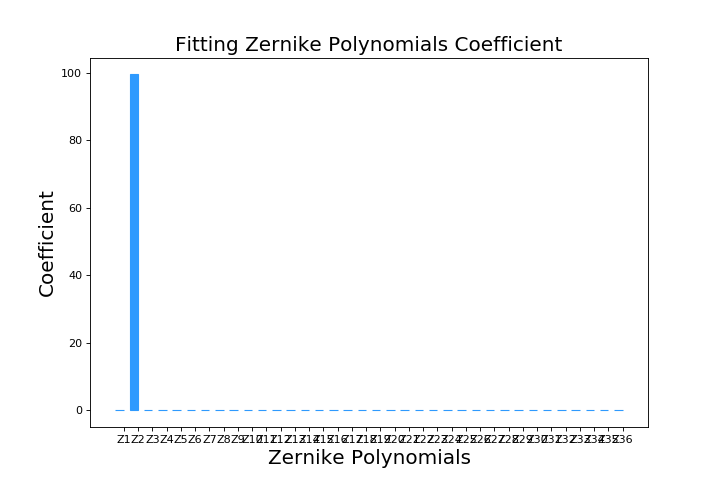

<IPython.core.display.Javascript object>


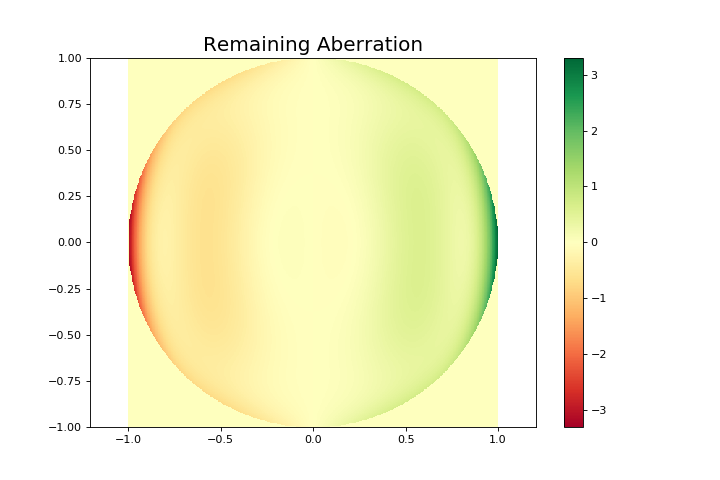

                            Zernike Polynomials List                              
----------------------------------------------------------------------------------
|   Z1  |   Z2  |   Z3  |   Z4  |   Z5  |   Z6  |   Z7  |   Z8  |   Z9  |  Z10  |
----------------------------------------------------------------------------------
| 0.000 |99.540 |-0.000 |-0.000 |-0.000 |-0.000 |-0.000 |-0.099 | 0.000 |-0.051 |
----------------------------------------------------------------------------------
|  Z11  |  Z12  |  Z13  |  Z14  |  Z15  |  Z16  |  Z17  |  Z18  |  Z19  |  Z20  |
----------------------------------------------------------------------------------
|-0.000 |-0.000 |-0.000 |-0.000 |-0.000 |-0.121 |-0.000 |-0.062 | 0.000 |-0.062 |
----------------------------------------------------------------------------------
|  Z21  |  Z22  |  Z23  |  Z24  |  Z25  |  Z26  |  Z27  |  Z28  |  Z29  |  Z30  |
----------------------------------------------------------------------------------
|-0.000 |

In [17]:
numZsFit = 36
fitlist,C1 = opticspy.zernike.fitting(z2m,
                                      numZsFit,
                                      remain2D=1,
                                      barchart=1)

## Reorder Zernikes

In [18]:
from zernikeIndexing import noll2asAnsi, printZs
# why does the fitlist start with a zero? for Z0??  Anyways, avoid it
nollZs = fitlist[1:(numZsFit+1)]
asAnsiZs = noll2asAnsi(nollZs)
print "nolZs"
printZs(nollZs)
print "active surface Zs"
printZs(asAnsiZs)

nolZs
[0]
[99.54, -0.0]
[-0.0, -0.0, -0.0]
[-0.0, -0.099, 0.0, -0.051]
[-0.0, -0.0, -0.0, -0.0, -0.0]
[-0.121, -0.0, -0.062, 0.0, -0.062, -0.0]
[-0.0, -0.0, -0.0, 0.0, 0.0, -0.0, 0.0]
[0.0, -0.139, -0.0, -0.071, -0.0, -0.071, 0.0, -0.021]
active surface Zs
[0]
[99.54, -0.0]
[-0.0, -0.0, -0.0]
[-0.051, -0.099, -0.0, 0.0]
[-0.0, -0.0, -0.0, -0.0, -0.0]
[-0.062, -0.062, -0.121, -0.0, 0.0, -0.0]
[-0.0, 0.0, -0.0, -0.0, -0.0, 0.0, -0.0]
[-0.021, -0.071, -0.071, -0.139, 0.0, -0.0, -0.0, 0.0]


In [11]:
asAnsiZs[1]

0.995

In [19]:
np.save("/users/pmargani/bumpIdentityZs", asAnsiZs)

## Send zernikes to Active Surface
We can't do this from the notebook because it's Sparrow code.
But below we analyze the results from the scans we ran.

In [13]:
from analyzeActiveSurface import *


Scan:  17
FITS:  /users/pmargani/tmp/simdata/TINT_210219/ActiveSurfaceMgr/2019_02_22_16:47:39.fits
Zeros enabled: 0
FEM enabled: 0
Random enabled: 0
Zernikes enabled: 0
Thermal Zernikes enabled 1


<IPython.core.display.Javascript object>


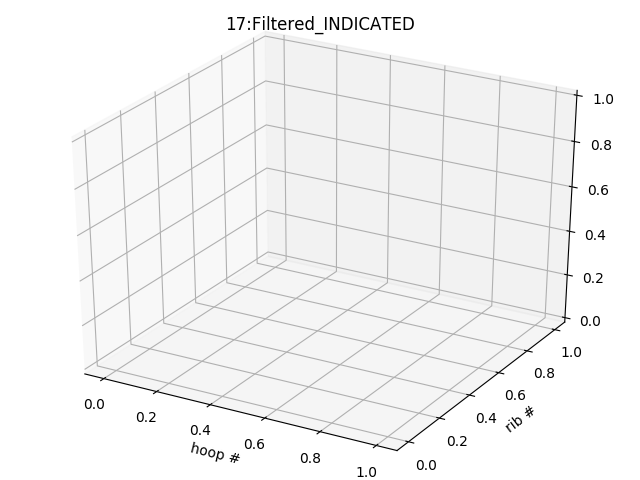

total indicated:  2209
filtered indicated:  0


<IPython.core.display.Javascript object>


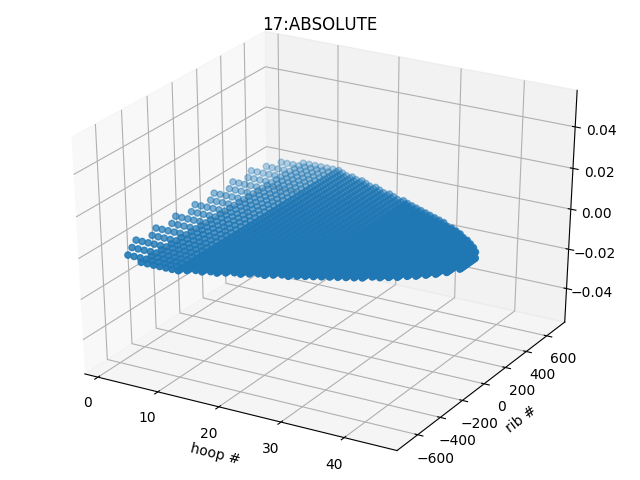

Txt: /users/pmargani/tmp/simdata/TINT_210219/ActiveSurfaceMgr/asdata.17.txt
['# Active surface commands at 39.491978\n', '# Zero points are Off, FEM corrections are Off\n']


<IPython.core.display.Javascript object>


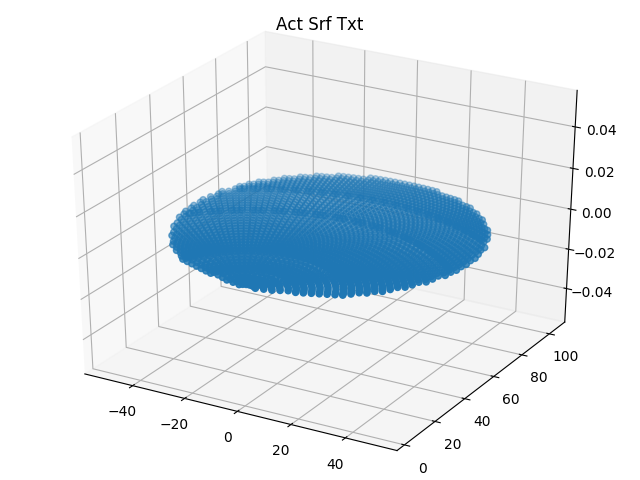

Smoothed data using 100 x 100 size grid, sigs: 0.100000, 0.100000


<IPython.core.display.Javascript object>


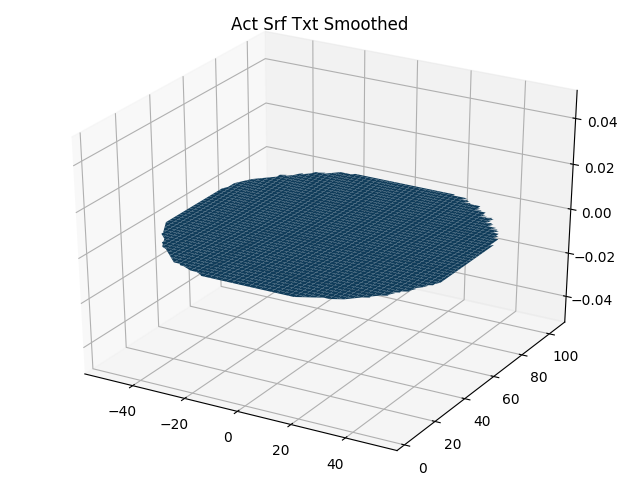

<IPython.core.display.Javascript object>


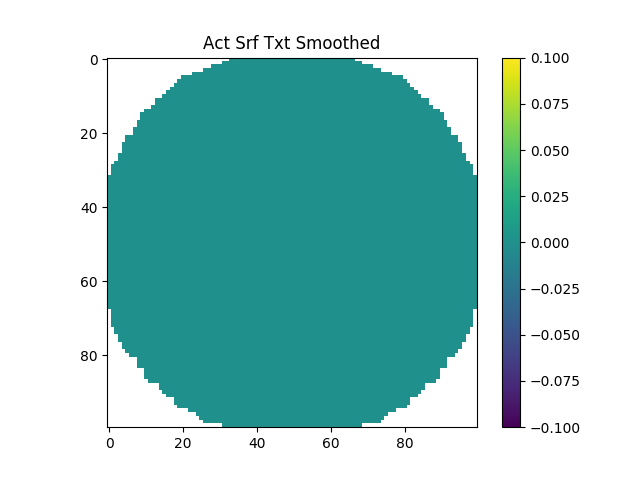


Scan:  18
FITS:  /users/pmargani/tmp/simdata/TINT_210219/ActiveSurfaceMgr/2019_02_22_16:53:25.fits
Zeros enabled: 0
FEM enabled: 0
Random enabled: 0
Zernikes enabled: 0
Thermal Zernikes enabled 1


<IPython.core.display.Javascript object>


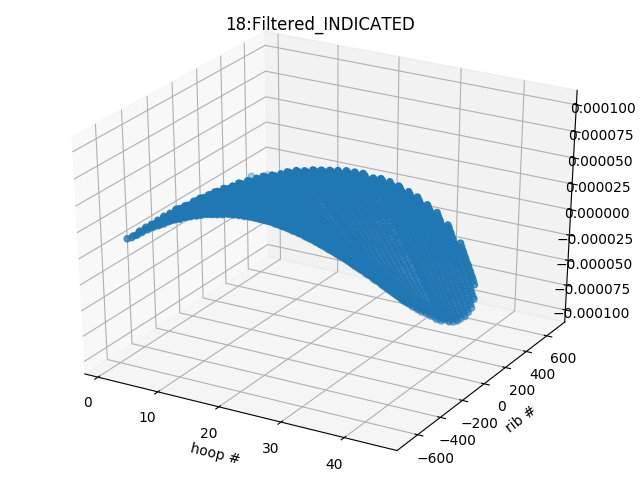

total indicated:  2209
filtered indicated:  2204


<IPython.core.display.Javascript object>


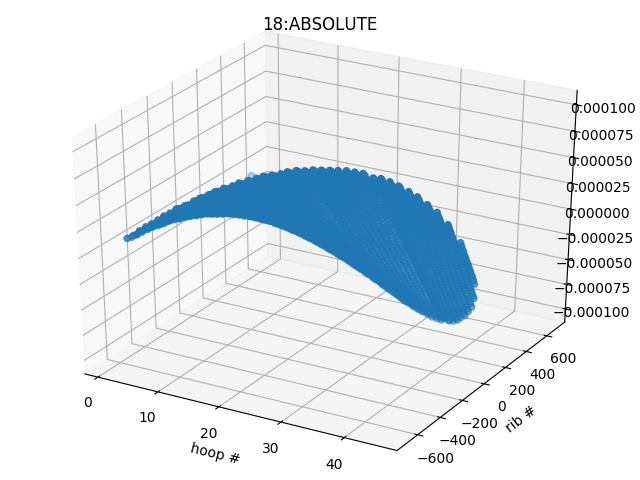

Txt: /users/pmargani/tmp/simdata/TINT_210219/ActiveSurfaceMgr/asdata.18.txt
['# Active surface commands at 40.341707\n', '# Zero points are Off, FEM corrections are Off\n']


<IPython.core.display.Javascript object>


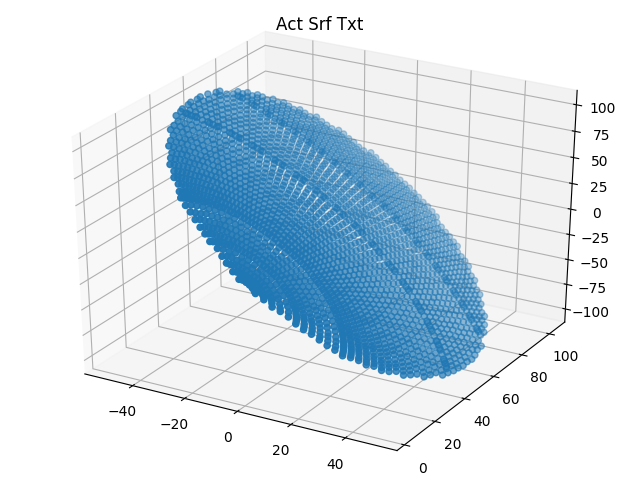

Smoothed data using 100 x 100 size grid, sigs: 0.100000, 0.100000


<IPython.core.display.Javascript object>


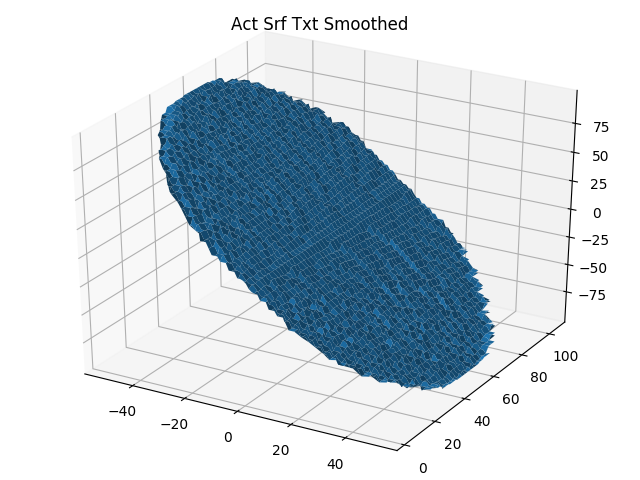

<IPython.core.display.Javascript object>


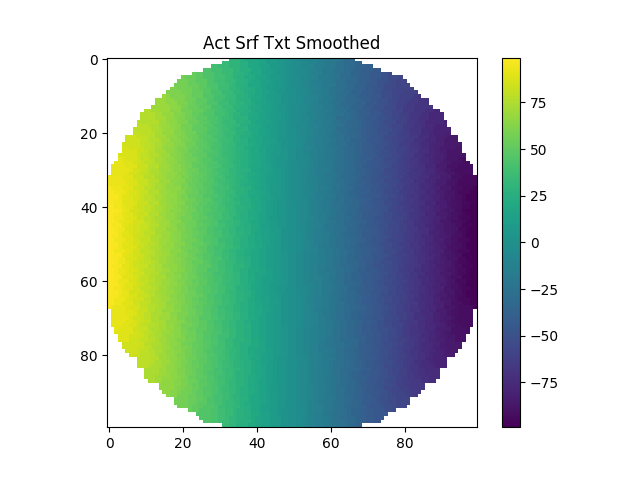

<IPython.core.display.Javascript object>


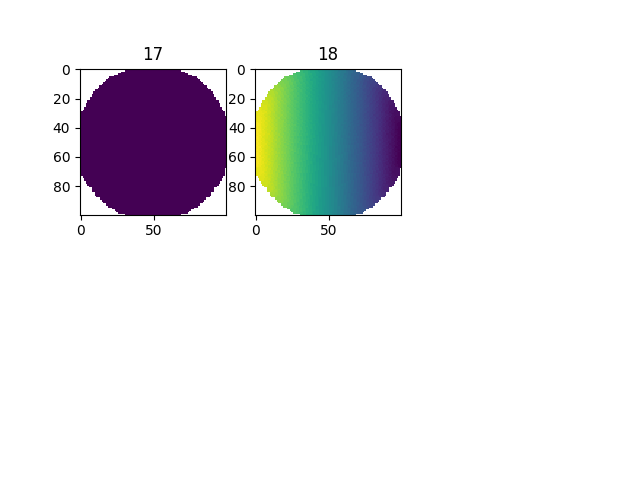

['# Active surface commands at 39.491978\n', '# Zero points are Off, FEM corrections are Off\n']
['# Active surface commands at 40.341707\n', '# Zero points are Off, FEM corrections are Off\n']


In [21]:
# Scan 17: using a magnitude of 1 for the simulated data
# Scan 18: using a magnitude of 100
# Note how we can't distinguish the ramp with a small amplitude, but at 100 we see the ramp we expect!
path = "/users/pmargani/tmp/simdata/TINT_210219/"
scans = [17, 18]
analyzeActiveSurfaceScans(path, scans, details=True)

## We have Identity!
The fact that the picture labeled '18' above looks like the zernikemap from the beginning means our identity test worked.